In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import gmean

In [2]:
constituent_stocks = pd.read_csv('IDX_Smprat.csv')
stocks_info = pd.read_csv('IDX_Smpinfo.csv')
market_cap = pd.read_csv('IDX_Idxstk.csv')
index_info = pd.read_csv('IDX_Idxinfo.csv')
changes = pd.read_csv('IDX_Chgsmp.csv')
industries = pd.read_csv('STK_INDCLASSIFYSETS.csv')

In [3]:
industries = industries[industries['INDCLASSIFYSYSTEMCODE'] == 'P0207'] #P0207：证监会行业分类2012版
market_cap.rename(columns = {"Idxstk07": "cap"}, inplace = True)

stocks = constituent_stocks.merge(stocks_info, how = 'left', on = 'Stkcd')
stocks = stocks.merge(market_cap, how = 'left', on = 'Stkcd')

industry = []
for s in stocks['Smpinfo07']:
    industry.append(s[0])
stocks['industry'] = industry

In [104]:
ind = industries[industries['P_INDUSTRYCODE'] == '0'][['INDUSTRYCODE', 'INDUSTRYNAME']]
ind.rename(columns = {"INDUSTRYCODE": "industry"}, inplace = True)
stocks = stocks.merge(ind, how = 'left', on = 'industry')

In [106]:
sz50_indus = stocks[stocks['Indexcd'] == 16]['INDUSTRYNAME'].value_counts()
hs300_indus = stocks[stocks['Indexcd'] == 300]['INDUSTRYNAME'].value_counts()
zz500_indus = stocks[stocks['Indexcd'] == 905]['INDUSTRYNAME'].value_counts()
sz50_indus, hs300_indus, zz500_indus

(制造业                 16
 信息传输、软件和信息技术服务业     15
 交通运输、仓储和邮政业          8
 采矿业                  5
 房地产业                 2
 建筑业                  1
 电力、热力、燃气及水生产和供应业     1
 金融业                  1
 批发和零售业               1
 Name: INDUSTRYNAME, dtype: int64,
 制造业                 128
 信息传输、软件和信息技术服务业      54
 交通运输、仓储和邮政业          51
 房地产业                 13
 采矿业                  10
 批发和零售业                9
 电力、热力、燃气及水生产和供应业      8
 建筑业                   8
 金融业                   7
 住宿和餐饮业                7
 农、林、牧、渔业              3
 租赁和商务服务业              2
 Name: INDUSTRYNAME, dtype: int64,
 制造业                 218
 交通运输、仓储和邮政业          87
 信息传输、软件和信息技术服务业      41
 金融业                  23
 采矿业                  23
 电力、热力、燃气及水生产和供应业     21
 住宿和餐饮业               21
 房地产业                 20
 批发和零售业               19
 建筑业                  10
 租赁和商务服务业              9
 农、林、牧、渔业              6
 科学研究和技术服务业            2
 Name: INDUSTRYNAME, dtype: int64)

In [115]:
pd.DataFrame(zz500_indus)#, pd.DataFrame(hs300_indus), pd.DataFrame(zz500_indus)

,INDUSTRYNAME
制造业,218
交通运输、仓储和邮政业,87
信息传输、软件和信息技术服务业,41
金融业,23
采矿业,23
电力、热力、燃气及水生产和供应业,21
住宿和餐饮业,21
房地产业,20
批发和零售业,19
建筑业,10


In [132]:
sz50_cap_s = stocks[stocks['Indexcd'] == 16]['cap'].sum()
hs300_cap_s = stocks[stocks['Indexcd'] == 300]['cap'].sum()
zz500_cap_s = stocks[stocks['Indexcd'] == 905]['cap'].sum()
# max, min

In [133]:
print('Five largest constituent stocks for SSE50')
print('Total float market capitalization: ', sz50_cap_s)
sz50_cap = stocks[stocks['Indexcd'] == 16][['Stkcd', 'Constdnme', 'cap', 'INDUSTRYNAME']].sort_values(by='cap', ascending = False)#.head()
sz50_cap['percent'] = sz50_cap['cap']/sz50_cap_s
sz50_cap.head()

Five largest constituent stocks for SSE50
Total float market capitalization:  19646810849.9


,Stkcd,Constdnme,cap,INDUSTRYNAME,percent
39,600519,贵州茅台,2.575205e+09,制造业,0.131075
20,601398,工商银行,1.650161e+09,信息传输、软件和信息技术服务业,0.083991
13,600036,招商银行,1.228459e+09,信息传输、软件和信息技术服务业,0.062527
6,601288,农业银行,9.702687e+08,信息传输、软件和信息技术服务业,0.049386
47,601318,中国平安,9.215070e+08,信息传输、软件和信息技术服务业,0.046904


In [135]:
print('Five largest constituent stocks for CSI300')
print('Total float market capitalization: ', hs300_cap_s)
hs300_cap = stocks[stocks['Indexcd'] == 300][['Stkcd', 'Constdnme', 'cap', 'INDUSTRYNAME']].sort_values(by='cap', ascending = False)#.head()
hs300_cap['percent'] = hs300_cap['cap']/hs300_cap_s
hs300_cap.head()

Five largest constituent stocks for CSI300
Total float market capitalization:  47361845933.33


,Stkcd,Constdnme,cap,INDUSTRYNAME,percent
334,600519,贵州茅台,2.575205e+09,制造业,0.054373
199,601398,工商银行,1.650161e+09,信息传输、软件和信息技术服务业,0.034842
91,601939,建设银行,1.465064e+09,信息传输、软件和信息技术服务业,0.030933
330,600036,招商银行,1.228459e+09,信息传输、软件和信息技术服务业,0.025938
167,300750,宁德时代,1.198730e+09,制造业,0.025310


In [141]:
print('Five largest constituent stocks for CSI500')
print('Total float market capitalization: ', zz500_cap_s)
zz500_cap = stocks[stocks['Indexcd'] == 905][['Stkcd', 'Constdnme', 'cap', 'INDUSTRYNAME']].sort_values(by='cap', ascending = False)#.head()
zz500_cap['percent'] = zz500_cap['cap']/zz500_cap_s
zz500_cap.head()

Five largest constituent stocks for CSI500
Total float market capitalization:  11748465694.86


,Stkcd,Constdnme,cap,INDUSTRYNAME,percent
464,600188,兖矿能源,1.146896e+08,采矿业,0.009762
541,2013,中航机电,7.062544e+07,制造业,0.006011
410,723,美锦能源,6.443682e+07,制造业,0.005485
787,733,振华科技,6.433300e+07,交通运输、仓储和邮政业,0.005476
752,39,中集集团,6.184178e+07,制造业,0.005264


In [6]:
changes['dates'] = pd.to_datetime(changes['Chgsmp01'])
changes = changes.set_index(changes['dates'])

sz50_enter = changes[(changes['Indexcd'] == 16) & (changes['Chgsmp04'] == 1)].resample('M').sum()['Chgsmp04']
sz50_quit = changes[(changes['Indexcd'] == 16) & (changes['Chgsmp04'] == 2)].resample('M').sum()['Chgsmp04']/2

hs300_enter = changes[(changes['Indexcd'] == 300) & (changes['Chgsmp04'] == 1)].resample('M').sum()['Chgsmp04']
hs300_quit = changes[(changes['Indexcd'] == 300) & (changes['Chgsmp04'] == 2)].resample('M').sum()['Chgsmp04']/2

zz500_enter = changes[(changes['Indexcd'] == 905) & (changes['Chgsmp04'] == 1)].resample('M').sum()['Chgsmp04']
zz500_quit = changes[(changes['Indexcd'] == 905) & (changes['Chgsmp04'] == 2)].resample('M').sum()['Chgsmp04']/2

In [150]:
pd.DataFrame({'SSE50_enter':sz50_enter, 'SSE50_quit':sz50_quit, 
'CSI300_enter':hs300_enter, 'CsI300_quit':hs300_quit,
'CSI500_enter':zz500_enter, 'CSI500_quit':zz500_quit}).to_csv('temp.csv')

In [92]:
changes

,Indexcd,Chgsmp01,Chgsmp02,Chgsmp03,Chgsmp04,dates
dates,,,,,,
1991-07-15,1,1991-07-15,600601,方正科技,1,1991-07-15
1991-07-15,1,1991-07-15,600602,广电电子,1,1991-07-15
1991-07-15,1,1991-07-15,600651,飞乐音响,1,1991-07-15
1991-07-15,1,1991-07-15,600652,爱使股份,1,1991-07-15
1991-07-15,1,1991-07-15,600653,申华控股,1,1991-07-15
...,...,...,...,...,...,...
2022-06-13,905,2022-06-13,603893,瑞芯微,2,2022-06-13
2022-06-13,905,2022-06-13,605358,立昂微,2,2022-06-13
2022-06-13,905,2022-06-13,688005,容百科技,2,2022-06-13


In [35]:
df1 = pd.read_csv('IDX_Idxtrd_1.csv')
df2 = pd.read_csv('IDX_Idxtrd_2.csv')
df3 = pd.read_csv('IDX_Idxtrd_3.csv')
df4 = pd.read_csv('IDX_Idxtrd_4.csv')
daily_return = pd.concat([df1, df2, df3, df4])

In [151]:
daily_return['ret'] = daily_return['Idxtrd08']/100
#daily_return['log_ret'] = daily_return['ret'] + 1

print(daily_return[daily_return['Indexcd'] == 16]['ret'].mean() * 250)
print(daily_return[daily_return['Indexcd'] == 16]['ret'].var() * 250)
print(daily_return[daily_return['Indexcd'] == 16]['ret'].skew())

0.02788617295901905
0.052112851004725645
-0.24435693666908015


In [152]:
print(daily_return[daily_return['Indexcd'] == 300]['ret'].mean() * 250)
print(daily_return[daily_return['Indexcd'] == 300]['ret'].var() * 250)
print(daily_return[daily_return['Indexcd'] == 300]['ret'].skew())

0.0305229912875121
0.05075208788353695
-0.5287487257073729


In [153]:
print(daily_return[daily_return['Indexcd'] == 905]['ret'].mean() * 250)
print(daily_return[daily_return['Indexcd'] == 905]['ret'].var() * 250)
print(daily_return[daily_return['Indexcd'] == 905]['ret'].skew())

0.05296474669248144
0.06625927863132482
-0.8131372741799399


In [157]:
r_sse50 = daily_return[daily_return['Indexcd'] == 16]['ret'].tolist()
p_sse50 = [1] * len(r_sse50)
for i in range(1, len(r_sse50)):
    p_sse50[i] = p_sse50[i-1] * (1+r_sse50[i-1])
p_sse50

[1,
 0.98467,
 0.9961591295600001,
 0.9844193942181354,
 0.9647428193665033,
 0.9656863378438437,
 0.9706354803252935,
 0.9820812139092894,
 0.939634681762916,
 0.9486918204604287,
 0.9506650994469864,
 0.9480726357207945,
 0.9525835653215541,
 0.923912705172506,
 0.931062865597836,
 0.9319678587031971,
 0.9215559137857651,
 0.905102454501034,
 0.8867614583630251,
 0.8820625093951594,
 0.8786868561717041,
 0.8649626461651582,
 0.8669555201019228,
 0.8919264399474184,
 0.8854894068303178,
 0.8691370739543823,
 0.8658247925655421,
 0.8728336442613601,
 0.884952939411929,
 0.8869697471608488,
 0.8945072160722215,
 0.8885006001162965,
 0.87240718874639,
 0.8817070493784265,
 0.8938225859439355,
 0.8905681779085136,
 0.9049588690953373,
 0.9014774923259274,
 0.9052564859737577,
 0.8857129036980703,
 0.888066242883196,
 0.894621059821917,
 0.9015561622776564,
 0.8976830770045117,
 0.9006355566447796,
 0.8906466076860323,
 0.8774115990958179,
 0.8855522239122288,
 0.9033925590151646,
 0.89864

In [159]:
r_csi300 = daily_return[daily_return['Indexcd'] == 300]['ret'].tolist()
p_csi300 = [1] * len(r_csi300)
for i in range(1, len(r_csi300)):
    p_csi300[i] = p_csi300[i-1] * (1+r_csi300[i-1])
p_csi300

[1,
 0.988687,
 0.996743810363,
 0.9905041941101276,
 0.9708516003947886,
 0.9732767876925746,
 0.973814036479381,
 0.988600428809284,
 0.9567803468071996,
 0.9701790987838875,
 0.9740074255076887,
 0.9790245377564787,
 0.9809258034088019,
 0.9493095838391328,
 0.9532644075654065,
 0.9414153309793685,
 0.9307349740494075,
 0.9069044357738465,
 0.894535166174327,
 0.8967723986249291,
 0.8960980257811632,
 0.881709379781195,
 0.8798860047838075,
 0.903525902074334,
 0.9001918914956798,
 0.881815374222687,
 0.8812280851834546,
 0.8863180586034742,
 0.8988860486744715,
 0.9006397753554355,
 0.9092760101613189,
 0.9042613529652792,
 0.8945513945571381,
 0.9073738942467201,
 0.9206995872576275,
 0.91777452466891,
 0.9297303734017718,
 0.9260439924712338,
 0.9327115092170268,
 0.9090765995734673,
 0.9116465591204614,
 0.9190354544821329,
 0.9245395578190264,
 0.917220902679331,
 0.9163871488787955,
 0.9041991997987076,
 0.8902302263610172,
 0.896044319969381,
 0.9156067595629527,
 0.913827735

In [162]:
r_csi500 = daily_return[daily_return['Indexcd'] == 905]['ret'].tolist()
p_csi500 = [1] * len(r_csi500)
for i in range(1, len(r_csi500)):
    p_csi500[i] = p_csi500[i-1] * (1+r_csi500[i-1])
p_csi500

[1,
 1.005634,
 1.0161016443059998,
 1.0144962037079963,
 0.9941809172287437,
 1.006507766421463,
 1.0128618499508817,
 1.0344165629796864,
 1.0235789806493483,
 1.0510201095415768,
 1.0585002196611841,
 1.0766503229277145,
 1.076864576341977,
 1.0369667437885068,
 1.040565018389453,
 1.0117309617298813,
 0.9990853364392195,
 0.9574424605310964,
 0.9513627009067239,
 0.9668061716305427,
 0.9753382360951823,
 0.9656892149254926,
 0.9590896948306918,
 0.9727586411614187,
 0.9828714399949329,
 0.9612119020717645,
 0.9611225093648719,
 0.9613454897870445,
 0.9734651723767898,
 0.9712962919727343,
 0.9846069363579285,
 0.9853493299879423,
 0.9941800306832942,
 1.0158332717515763,
 1.0322623432556146,
 1.033310089534019,
 1.0448139307608013,
 1.045710381113394,
 1.0609024615302096,
 1.0225752383025077,
 1.0266041847414196,
 1.0377500263751571,
 1.0389870244065964,
 1.0253555146463817,
 1.017302372434349,
 1.001693902134089,
 0.9931995378439918,
 1.001384495235364,
 1.0291598969797073,
 1.032

In [169]:
print(p_sse50[-1]**(250/len(p_sse50))-1)
print(p_csi300[-1]**(250/len(p_csi300))-1)
print(p_csi500[-1]**(250/len(p_csi500))-1)

0.0017259642167626321
0.005498417273045897
0.020553186155762848


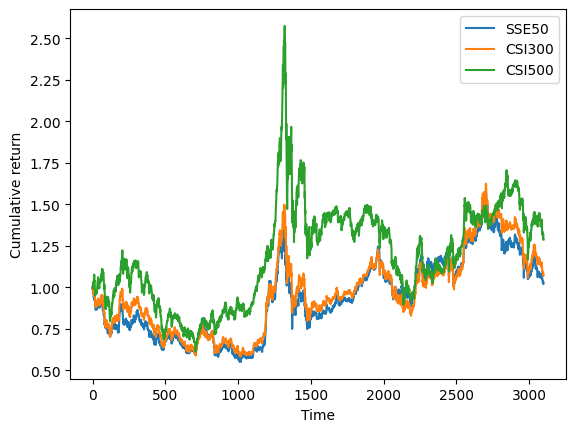

In [178]:
from cProfile import label
import matplotlib.pyplot as plt

plt.plot(p_sse50, label = 'SSE50')
plt.plot(p_csi300, label = 'CSI300')
plt.plot(p_csi500, label = 'CSI500')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.show()


In [77]:
sz = daily_return[daily_return['Indexcd'] == 1]
sz.rename(columns = {"ret": "sz_ret"}, inplace = True)

compare_ret = daily_return.merge(sz, how = 'left', on = 'Idxtrd01')
compare_ret['diff'] = compare_ret['ret'] - compare_ret['sz_ret']

/var/folders/q6/x6vj9jyx1wlgqfv7kl5r7q600000gn/T/ipykernel_13740/3920235177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sz.rename(columns = {"ret": "sz_ret"}, inplace = True)


In [179]:
compare_ret[compare_ret['Indexcd_x'] == 16]['diff'].mean(), compare_ret[compare_ret['Indexcd_x'] == 16]['diff'].var()
# alpha, beta

(5.122394320748626e-05, 3.385926206861957e-05)

In [88]:
compare_ret[compare_ret['Indexcd_x'] == 300]['diff'].mean(), compare_ret[compare_ret['Indexcd_x'] == 300]['diff'].var()

(6.17712165214585e-05, 9.947813150029862e-06)

In [180]:
compare_ret[compare_ret['Indexcd_x'] == 905]['diff'].mean(), compare_ret[compare_ret['Indexcd_x'] == 905]['diff'].var()

(0.00015153823814133589, 5.76957917683082e-05)

In [192]:
import tushare as ts
df = ts.get_hist_data('000002', start = '2022-01-05', end = '2022-01-05')
r = float(df['price_change']/(df['close'] - df['price_change']))

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


0.03318692044899951

In [244]:
ret = []
for i in range(changes.shape[0]):
    c = changes.iloc[i]
    idx = str(c['Chgsmp02'])
    date = c['Chgsmp01']
    df = ts.get_hist_data(idx, start = date, end = date)
    if df is None or df.empty:
        r = 0
    else:
        r = df['price_change']/(df['close'] - df['price_change'])
    ret.append(r)
ret

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
timed out
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushar

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [245]:
d = pd.DataFrame(ret).to_csv('ret.csv')


In [248]:
changes.iloc[2000]

Indexcd                       1
Chgsmp01             2020-09-28
Chgsmp02                 605218
Chgsmp03                   伟时电子
Chgsmp04                      1
dates       2020-09-28 00:00:00
Name: 2020-09-28 00:00:00, dtype: object

In [266]:
sse50 = changes[changes['Indexcd'] == 16]['ret']


In [265]:
dates = changes['Chgsmp01'].unique()
enter = {}
quit = {}
for d in dates:
    df = sse[changes['Chgsmp01'] == 16]['ret']

'1991-07-15'